In [17]:
import csv
import glob
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-whitegrid')
import numpy as np

In [18]:
def getAve(arr):
    return sum([int(x) for x in arr]) / len(arr)

def getListOfFiles(re, _pre = 7, _post = 4):
    return sorted(glob.glob(re), key=lambda s: int(s[_pre:-1 * _post]))

def getFirstRowOfCsv(file_name):
    with open(file_name, newline='') as csvfile:
        spamreader = csv.reader(csvfile, delimiter=',')
        # Retun the first row
        for row in spamreader:
            return row

In [21]:
### Global Variables
y = []
err = []
fileRE = '../experiments/Exp2-aws-ganache-done/20clients/Exp2-aws2-20clients-*.csv'
# fileRE = '../experiments/Exp1-aws-ganache-done/Exp1-aws2-*.csv'
preChar = 26 + 11 + 30
postChar = 4

In [22]:
### Main Execution
for file_name in getListOfFiles(fileRE,preChar,postChar):
    row = np.asarray(getFirstRowOfCsv(file_name))
    
    print(file_name, row)

    y.append(getAve(row))
    err.append(np.std(row.astype(np.float)))

../experiments/Exp2-aws-ganache-done/20clients/Exp2-aws2-20clients-1.csv ['720' '682' '616' '707' '689' '670' '630' '661' '708' '681' '602' '684'
 '709' '675' '661' '675' '731' '707' '735' '707']
../experiments/Exp2-aws-ganache-done/20clients/Exp2-aws2-20clients-2.csv ['1271' '1361' '1232' '1370' '1269' '1401' '1253' '1415' '1310' '1455'
 '1287' '1401' '1329' '1429' '1421' '1451' '1355' '1384' '1599' '1357']
../experiments/Exp2-aws-ganache-done/20clients/Exp2-aws2-20clients-3.csv ['2199' '2067' '2224' '2204' '2046' '2248' '2190' '2296' '2337' '2204'
 '2224' '2300' '2337' '2232' '2379' '2377' '2262' '2418' '2370' '2298']
../experiments/Exp2-aws-ganache-done/20clients/Exp2-aws2-20clients-4.csv ['3300' '3193' '3252' '3224' '3294' '3288' '3410' '3314' '3475' '3409'
 '3574' '3319' '3556' '3489' '3570' '3433' '3580' '3636' '3759' '3650']
../experiments/Exp2-aws-ganache-done/20clients/Exp2-aws2-20clients-5.csv ['4390' '4655' '4735' '4557' '4519' '4678' '4848' '4666' '4895' '5054'
 '4899' '494

[  682.5   1367.5   2260.6   3436.25  4876.4   6806.05  9484.85 12856.8
 17571.25 23819.45 32797.5  44213.85 61014.75]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13]
[35.04782446885969, 84.1745210856587, 95.54234663226563, 157.31969838516727, 232.17071305399398, 341.98749611645155, 483.5240712725686, 767.1201079361692, 1117.2082113464794, 1569.6692478034984, 1932.7016453658853, 3574.02038711309, 3580.2786326625474]


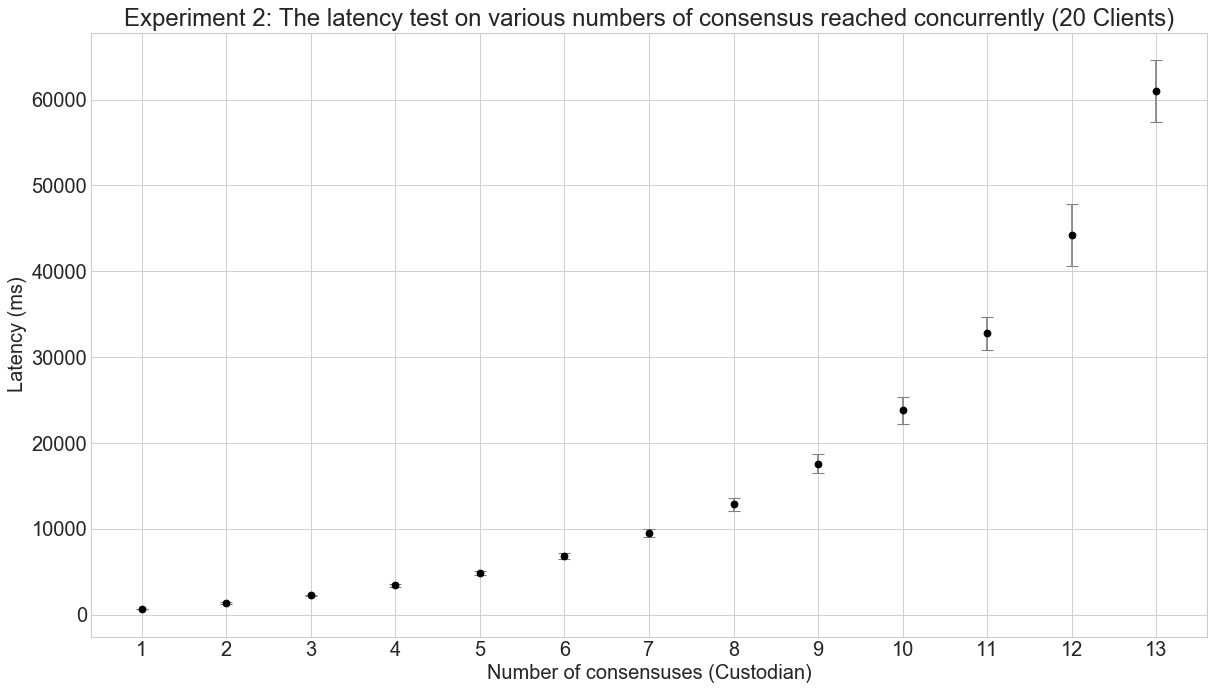

In [26]:
x = np.arange(1,14,1)
# x = np.arange(10,101,10)
y = np.asarray(y)
print(y)
print(x)
print(err)

plt.figure(num=None, figsize=(18, 10), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 18})
plt.xticks(np.arange(0, 15, step=1))
plt.yticks(np.arange(0, 70000, step=10000))
plt.xlabel("Number of consensuses (Custodian)")
# plt.xlabel("Number of voters (Clients)")
plt.ylabel("Latency (ms)")
plt.title("Experiment 2: The latency test on various numbers of consensus reached concurrently (20 Clients)")
plt.errorbar(x, y, err, fmt="ok", capsize=5, ecolor="grey");